In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle
from functions import get_dyn_v2, get_prop_abs_v2, create_R_v1, get_var_hist,simulate_traj,get_prop_abs, create_R, get_theo_var_l, get_x2_var
from setup import setup_matplotlib, two_col, one_col, std_height
#from scipy.linalg import expm
#from scipy.sparse import csr_array, coo_array
from scipy.optimize import curve_fit
from pathlib import Path
from matplotlib.colors import LogNorm
import cmcrameri.cm as cmc
mycmap = cmc.roma
mycmap2 = cmc.batlow
setup_matplotlib()

np.random.seed(42)

In [3]:
k = 1

In [4]:
all_data = {}
for filepath in (Path.cwd()/'nummeric_results/').glob('cusp_rate_s*.pkl'):
    s = float(filepath.stem.split('cusp_rate_s')[1])
    all_data[s] = pickle.loads(open(filepath, 'rb').read())
s_s = np.sort(list(all_data.keys()))

all_abs = {}
for filepath in (Path.cwd()/'nummeric_results/').glob('cusp_abs_s*.pkl'):
    s = float(filepath.stem.split('cusp_abs_s')[1])
    all_abs[s] = pickle.loads(open(filepath, 'rb').read())
    
s_s_abs = np.sort(list(all_abs.keys()))
s_s = np.sort(list(all_data.keys()))

if ~np.all(np.abs(s_s_abs - s_s) < 1e-10):
    print('s_s in abs different form all_data')

In [5]:
st_data = pickle.loads(open('nummeric_results/shorttime_cusp_rate.pkl', 'rb').read())
st_abs_data = pickle.loads(open('nummeric_results/shorttime_cusp_abs.pkl', 'rb').read())

In [6]:
all_num_rates_abs = np.stack([all_abs[s]['num_rates'] for s in s_s])
all_sim_rates_abs = np.stack([all_abs[s]['sim_rates'] for s in s_s])

all_num_rates = np.stack([all_data[s]['num_rates'] for s in s_s])
all_sim_rates = np.stack([all_data[s]['sim_rates'] for s in s_s])

st_rates = st_data['st_rates']
st_rates_abs = st_abs_data['st_rates']

In [7]:
taus = np.unique([all_data[si]['ltaus'] for si in s_s], axis = 0)
taus_abs = np.unique([all_abs[si]['ltaus'] for si in s_s_abs], axis = 0)

if len(taus) > 1:
    print('One file with other ltaus !!')
else:
    taus = taus[0]
    
if ~np.all(np.abs(taus_abs - taus) < 1e-10):
    print('tau in abs different form al_data')
    
if ~np.all(np.abs(st_data['ltaus'] - taus) < 1e-10):
    print('tau in st different form al_data')
    
if ~np.all(np.abs(st_data['s_s'] - s_s) < 1e-10):
    print('s_s in st different form al_data')
    
if ~np.all(np.abs(st_abs_data['ltaus'] - taus) < 1e-10):
    print('tau in st abs different form al_data')
    
if ~np.all(np.abs(st_abs_data['s_s'] - s_s) < 1e-10):
    print('s_s in st abs different form al_data')

In [8]:
taus, s_s

(array([0.05, 0.2 , 0.4 , 0.6 , 0.8 , 1.  , 1.2 , 1.4 , 1.6 , 1.8 , 2.  ]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
        0.75]))

[0.6]


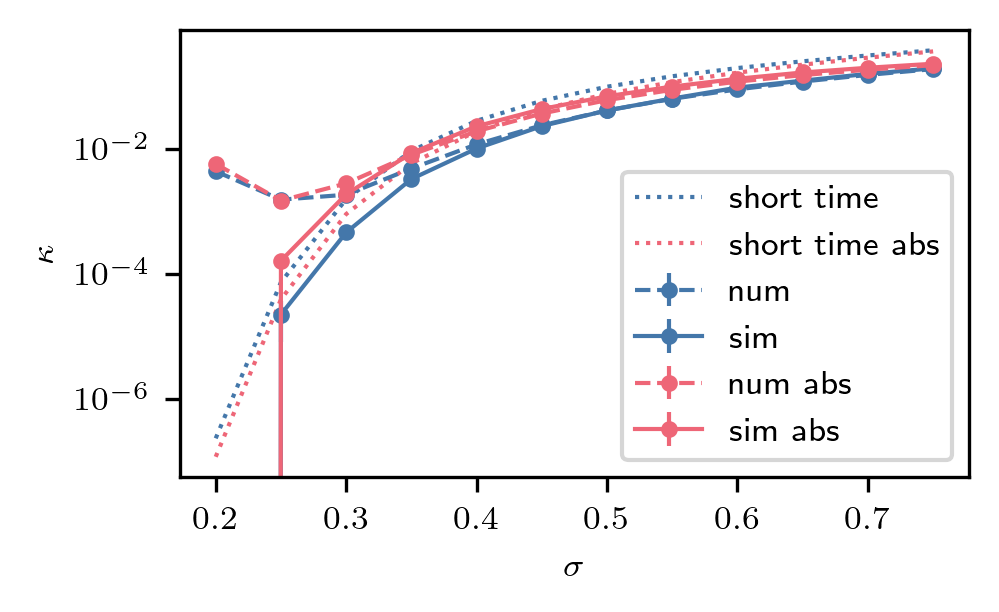

In [70]:
tau_is = [3]
print(taus[tau_is])
for tau_i  in tau_is:
    tau = taus[tau_i]
    plt.errorbar(s_s, *all_num_rates[:,tau_i].T, ls = '--', marker='.', label = 'num', color = 'C0')
    plt.errorbar(s_s, *all_sim_rates[:,tau_i].T, marker='.', label = 'sim', color = 'C0')
    
    plt.errorbar(s_s, *all_num_rates_abs[:,tau_i].T, ls = '--', marker='.', label = 'num abs', color = 'C1')
    plt.errorbar(s_s, *all_sim_rates_abs[:,tau_i].T, marker='.', label = 'sim abs', color = 'C1')
    
    plt.plot(s_s, st_rates[:,tau_i,0], ls=':',label = 'short time', color = 'C0')
    plt.plot(s_s, st_rates_abs[:,tau_i,0], ls=':',label = 'short time abs', color = 'C1')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\kappa$')
plt.yscale('log')
plt.legend()
#plt.ylim(1e-4,0.5e0)
plt.tight_layout()

0.35


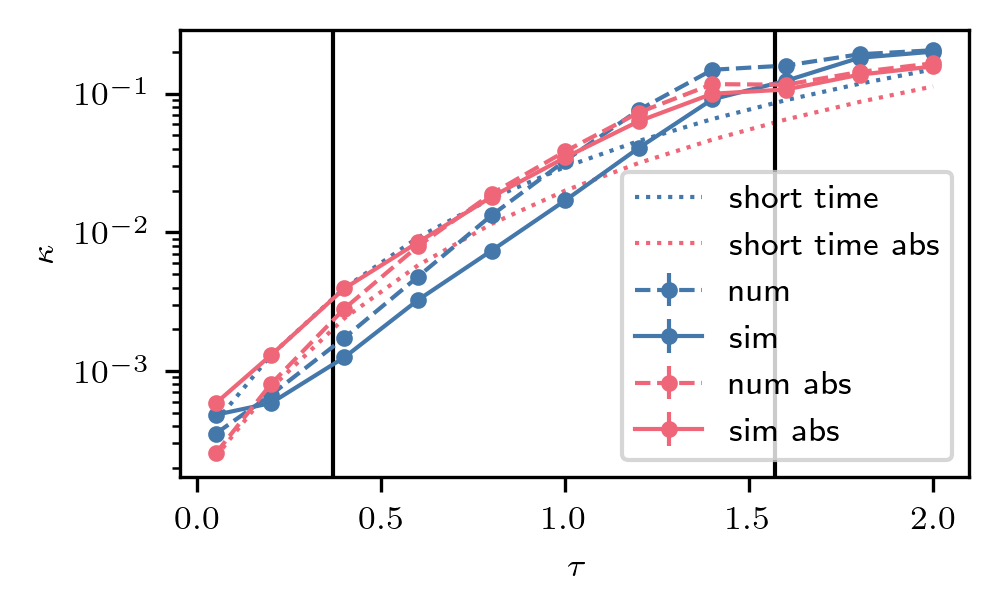

In [67]:
s_idx = 3
print(s_s[s_idx])
plt.errorbar(taus, *all_num_rates[s_idx].T, marker = '.', ls = '--', label = 'num', color = 'C0')
plt.errorbar(taus, *all_sim_rates[s_idx].T, marker = '.', label = 'sim', color = 'C0')

plt.errorbar(taus, *all_num_rates_abs[s_idx].T, marker = '.', ls = '--', label = 'num abs', color = 'C1')
plt.errorbar(taus, *all_sim_rates_abs[s_idx].T, marker = '.', label = 'sim abs', color = 'C1')

plt.plot(taus, st_rates[s_idx,:,0],ls= ':', label = 'short time', color = 'C0')
plt.plot(taus, st_rates_abs[s_idx,:,0],ls= ':', label = 'short time abs', color = 'C1')
plt.yscale('log')
plt.ylim(*plt.ylim())
plt.vlines([1/np.e /k, np.pi/2/k],*plt.ylim(), color='black')
# y = 4e-1
# plt.text(0.5*1/np.e /k,              y,'Regim I', ha='center', va='center')
# plt.text(0.5*(1/np.e /k+  np.pi/2/k),y,'Regim II',ha='center', va='center')
# plt.text(0.5*(np.pi/2/k + plt.xlim()[1]),            y,'Regim III',ha='center', va='center')


plt.xlabel(r'$\tau$')
plt.ylabel(r'$\kappa$')
plt.legend()
plt.tight_layout()

In [11]:
len(s_s), len(taus)

(12, 11)

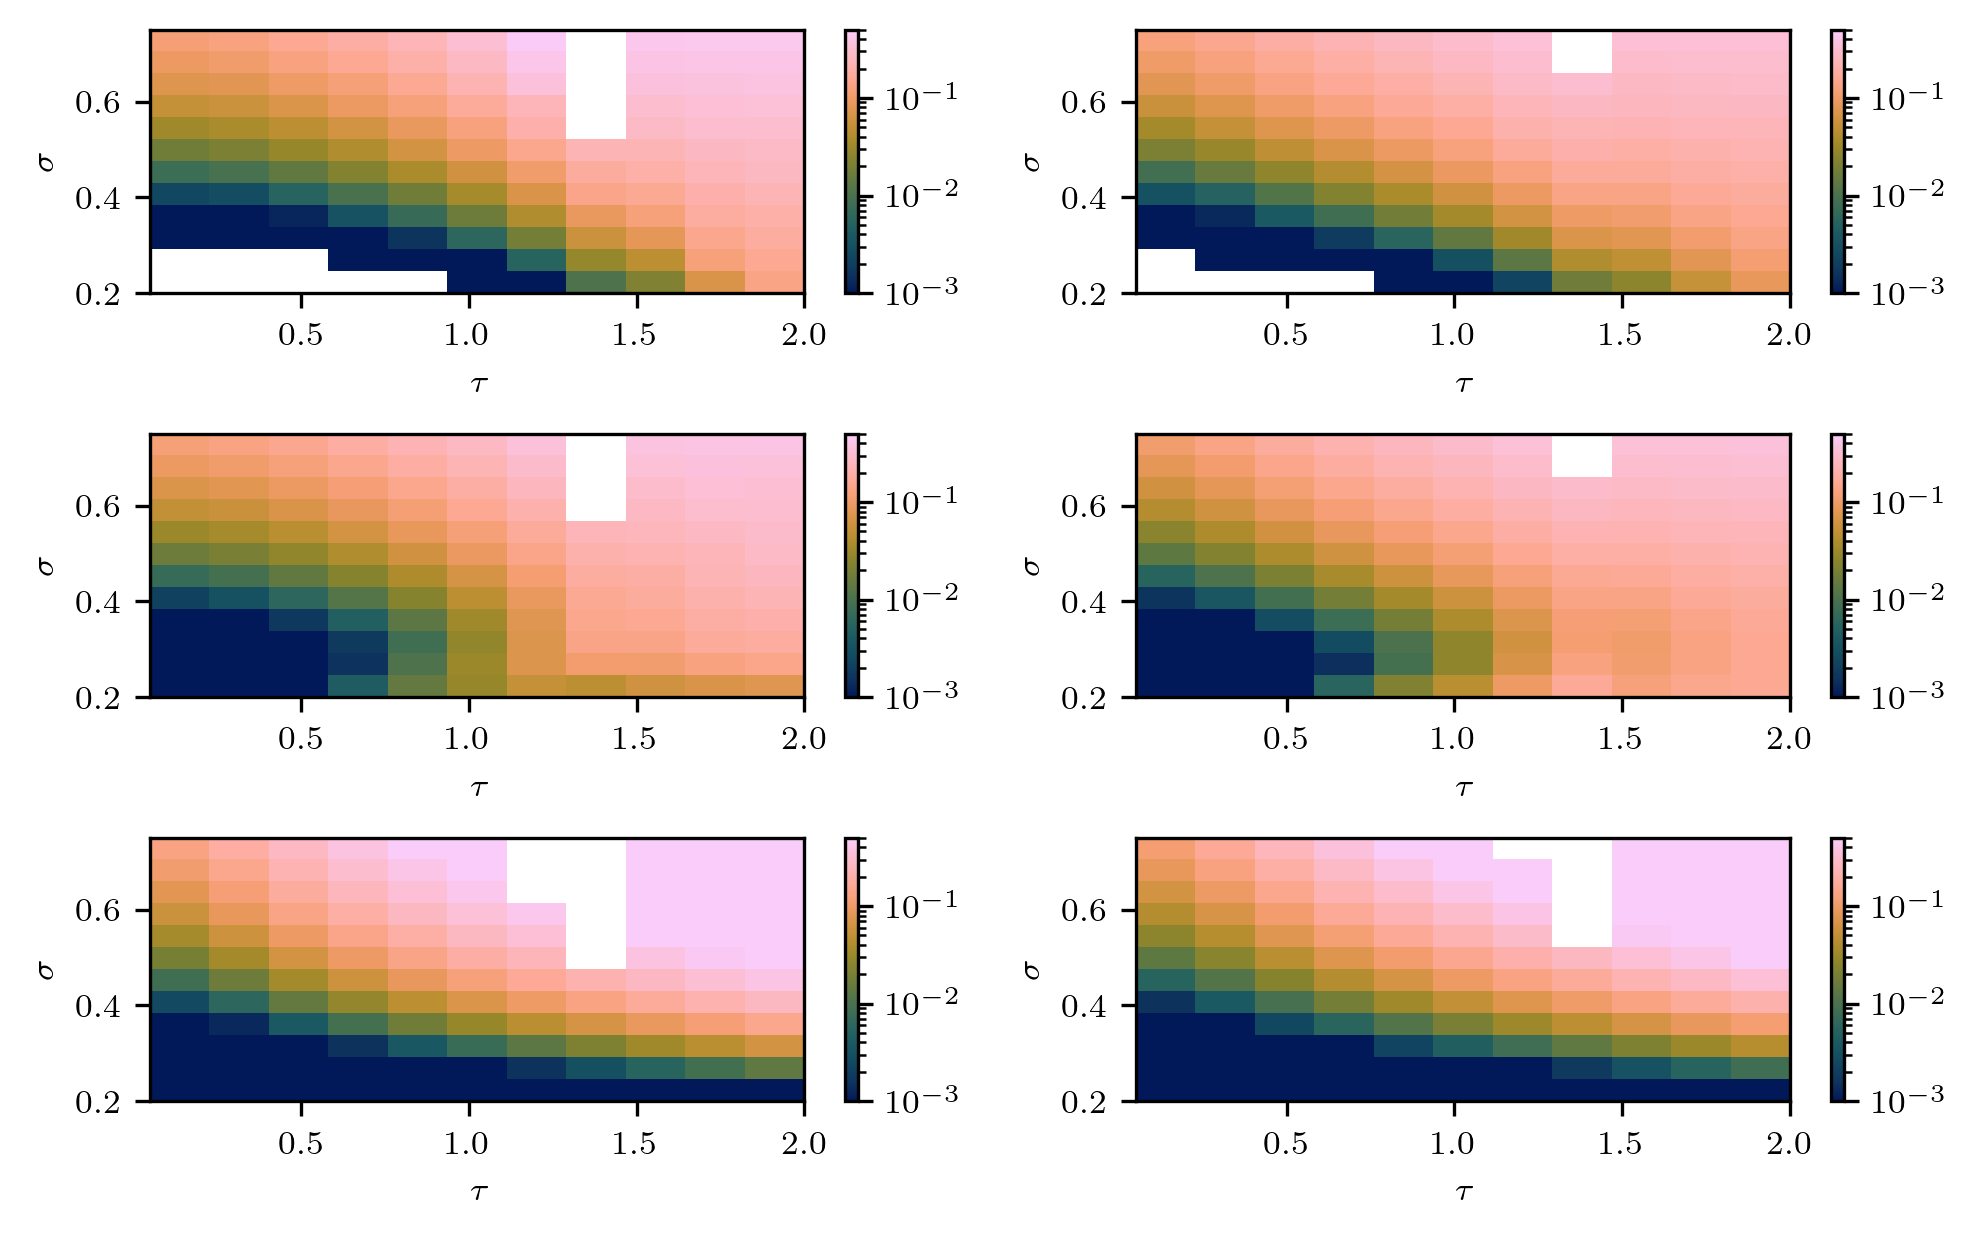

In [28]:
norm = LogNorm(vmin=1e-3, vmax=0.5)

fig, axs = plt.subplots(3,2,figsize=(two_col, std_height*2))

ims = axs[0,0].imshow(all_sim_rates[:,:,0],
           norm = norm,
           origin = 'lower',
           extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
          aspect='auto',
          cmap = mycmap2)
axs[0,0].set_xlabel(r'$\tau$')
axs[0,0].set_ylabel(r'$\sigma$')
plt.colorbar(ims,ax = axs[0,0])


ims = axs[0,1].imshow(all_sim_rates_abs[:,:,0],
    norm = norm,
    origin = 'lower',
    extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
    aspect='auto',
    cmap = mycmap2)
axs[0,1].set_xlabel(r'$\tau$')
axs[0,1].set_ylabel(r'$\sigma$')
plt.colorbar(ims,ax = axs[0,1])

if True:
    ims = axs[1,0].imshow(all_num_rates[:,:,0],
               norm = norm,
               origin = 'lower',
               extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
              aspect='auto',
              cmap = mycmap2)
    axs[1,0].set_xlabel(r'$\tau$')
    axs[1,0].set_ylabel(r'$\sigma$')
    plt.colorbar(ims, ax = axs[1,0])
    
    ims = axs[1,1].imshow(all_num_rates_abs[:,:,0],
        norm = norm,
        origin = 'lower',
        extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
        aspect='auto',
        cmap = mycmap2)
    axs[1,1].set_xlabel(r'$\tau$')
    axs[1,1].set_ylabel(r'$\sigma$')
    plt.colorbar(ims, ax = axs[1,1])
if True:
    ims = axs[2,0].imshow(st_rates[:,:,0],
               norm = norm,
               origin = 'lower',
               extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
              aspect='auto',
              cmap = mycmap2)
    axs[2,0].set_xlabel(r'$\tau$')
    axs[2,0].set_ylabel(r'$\sigma$')
    plt.colorbar(ims, ax = axs[2,0])
    

    ims = axs[2,1].imshow(st_rates_abs[:,:,0],
        norm = norm,
        origin = 'lower',
        extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
        aspect='auto',
        cmap = mycmap2)
    axs[2,1].set_xlabel(r'$\tau$')
    axs[2,1].set_ylabel(r'$\sigma$')
    plt.colorbar(ims, ax = axs[2,1])
            
plt.tight_layout()
#plt.savefig('graphics/rates_img.png', dpi = 300)

/tmp/ipykernel_15595/2281309634.py:4: RuntimeWarning: divide by zero encountered in divide
  ims = axs[0,0].imshow(all_num_rates[:,:,0] / all_sim_rates[:,:,0],
/tmp/ipykernel_15595/2281309634.py:14: RuntimeWarning: divide by zero encountered in divide
  ims = axs[0,1].imshow(all_num_rates_abs[:,:,0] / all_sim_rates_abs[:,:,0],
/tmp/ipykernel_15595/2281309634.py:25: RuntimeWarning: divide by zero encountered in divide
  ims = axs[1,0].imshow(st_rates[:,:,0] / all_sim_rates[:,:,0],
/tmp/ipykernel_15595/2281309634.py:35: RuntimeWarning: divide by zero encountered in divide
  ims = axs[1,1].imshow(st_rates_abs[:,:,0] / all_sim_rates_abs[:,:,0],


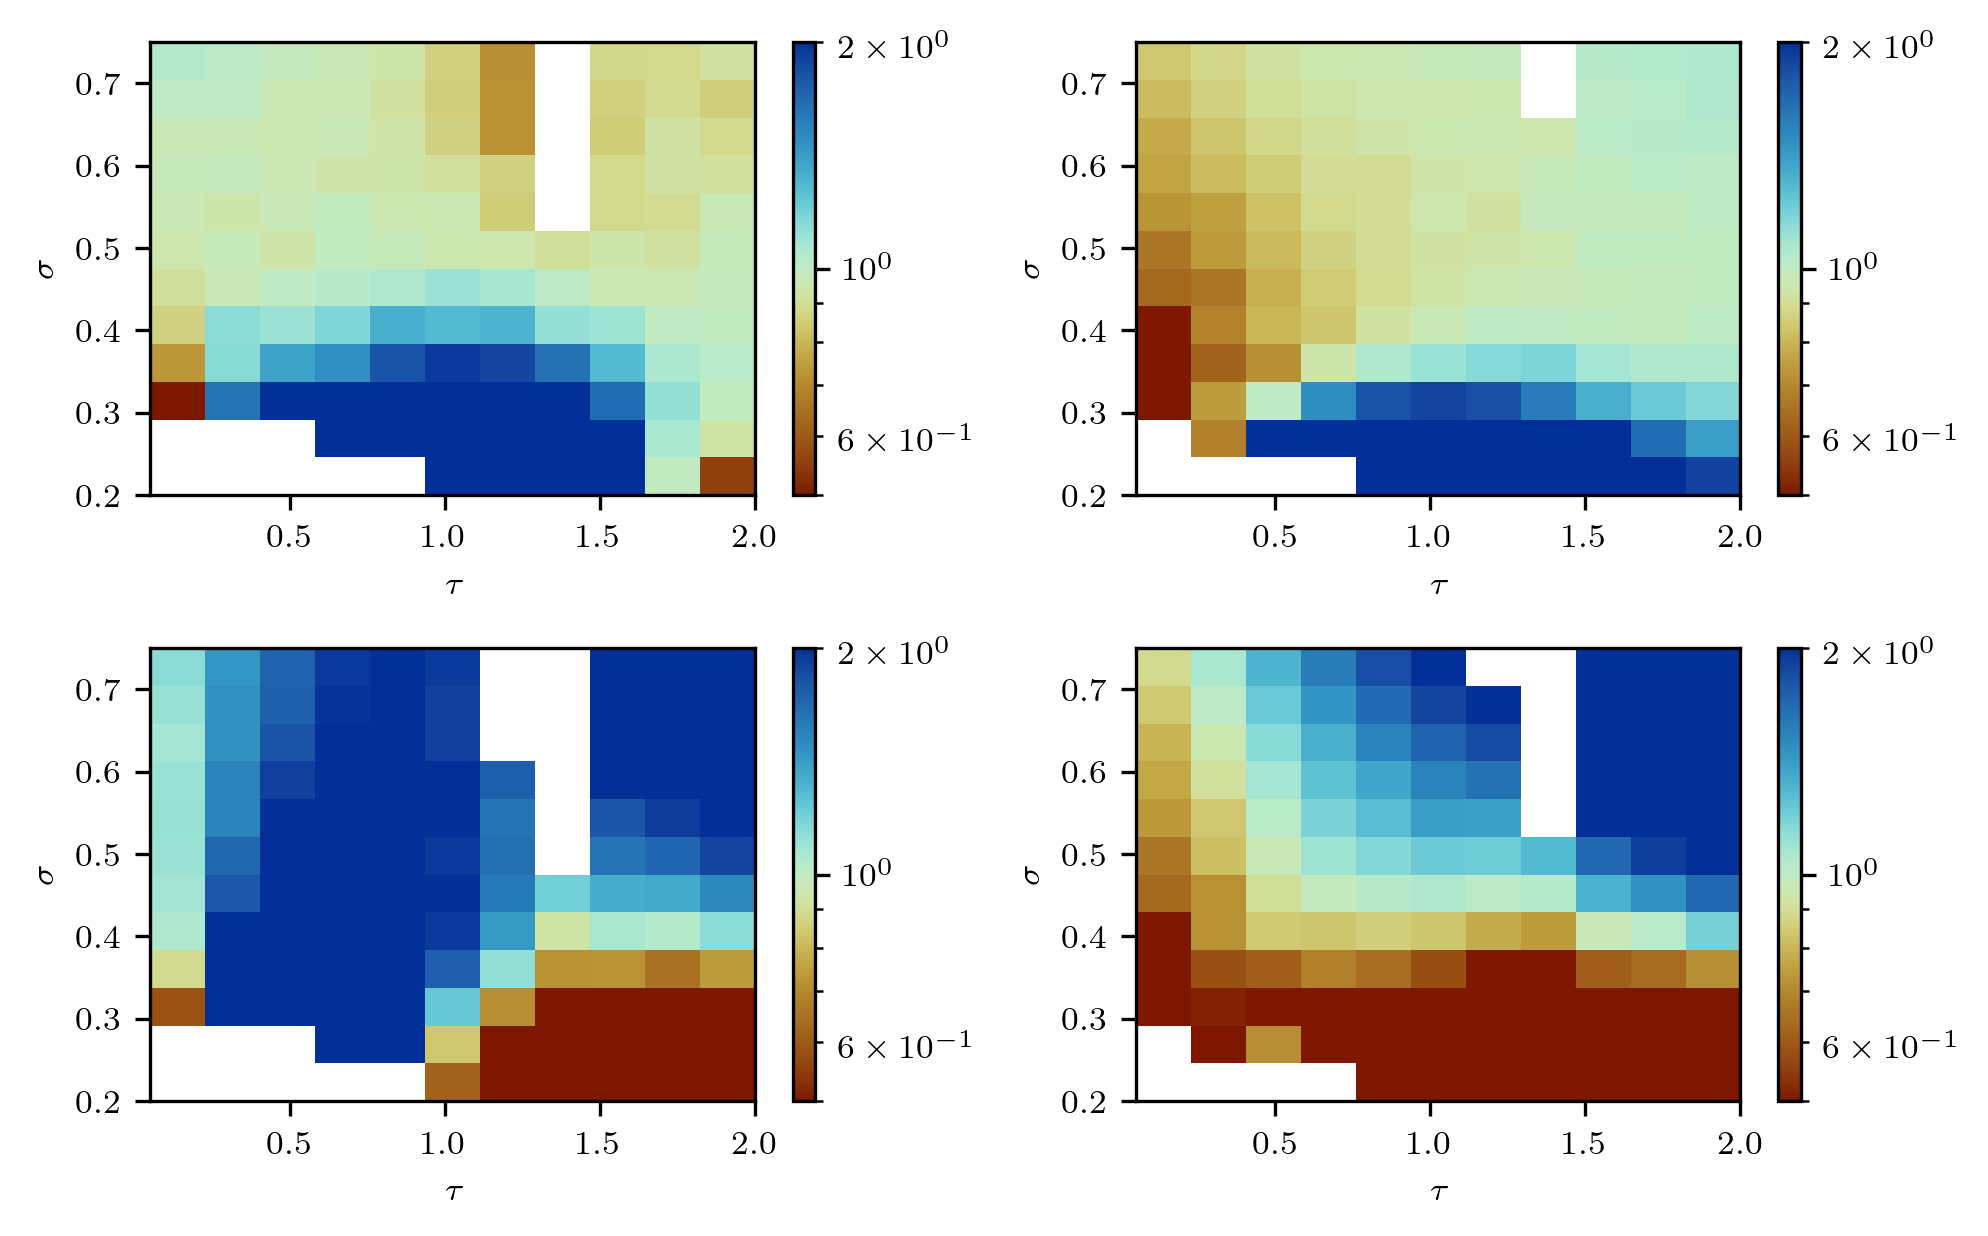

In [33]:
norm = LogNorm(vmin=0.5, vmax=2)

fig, axs = plt.subplots(2,2,figsize=(two_col, 2*std_height), squeeze=False)
ims = axs[0,0].imshow(all_num_rates[:,:,0] / all_sim_rates[:,:,0],
           norm = norm,
           origin = 'lower',
           extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
          aspect='auto',
          cmap = mycmap)
axs[0,0].set_xlabel(r'$\tau$')
axs[0,0].set_ylabel(r'$\sigma$')
plt.colorbar(ims, ax = axs[0,0])

ims = axs[0,1].imshow(all_num_rates_abs[:,:,0] / all_sim_rates_abs[:,:,0],
    norm = norm,
    origin = 'lower',
    extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
    aspect='auto',
    cmap = mycmap)
axs[0,1].set_xlabel(r'$\tau$')
axs[0,1].set_ylabel(r'$\sigma$')
plt.colorbar(ims, ax = axs[0,1])

if True: #change also subplot above 
    ims = axs[1,0].imshow(st_rates[:,:,0] / all_sim_rates[:,:,0],
               norm = norm,
               origin = 'lower',
               extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
              aspect='auto',
              cmap = mycmap)
    axs[1,0].set_xlabel(r'$\tau$')
    axs[1,0].set_ylabel(r'$\sigma$')
    plt.colorbar(ims, ax = axs[1,0])
    
    ims = axs[1,1].imshow(st_rates_abs[:,:,0] / all_sim_rates_abs[:,:,0],
        norm = norm,
        origin = 'lower',
        extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
        aspect='auto',
        cmap = mycmap)
    axs[1,1].set_xlabel(r'$\tau$')
    axs[1,1].set_ylabel(r'$\sigma$')
    plt.colorbar(ims, ax = axs[1,1])
            
plt.tight_layout()
#plt.savefig('graphics/rates_deviation_img.png', dpi = 300)

/tmp/ipykernel_15595/2994540211.py:15: RuntimeWarning: divide by zero encountered in divide
  ims = axs[0,1].imshow(all_sim_rates_abs[:,:,0] / all_sim_rates[:,:,0],
/tmp/ipykernel_15595/2994540211.py:15: RuntimeWarning: invalid value encountered in divide
  ims = axs[0,1].imshow(all_sim_rates_abs[:,:,0] / all_sim_rates[:,:,0],


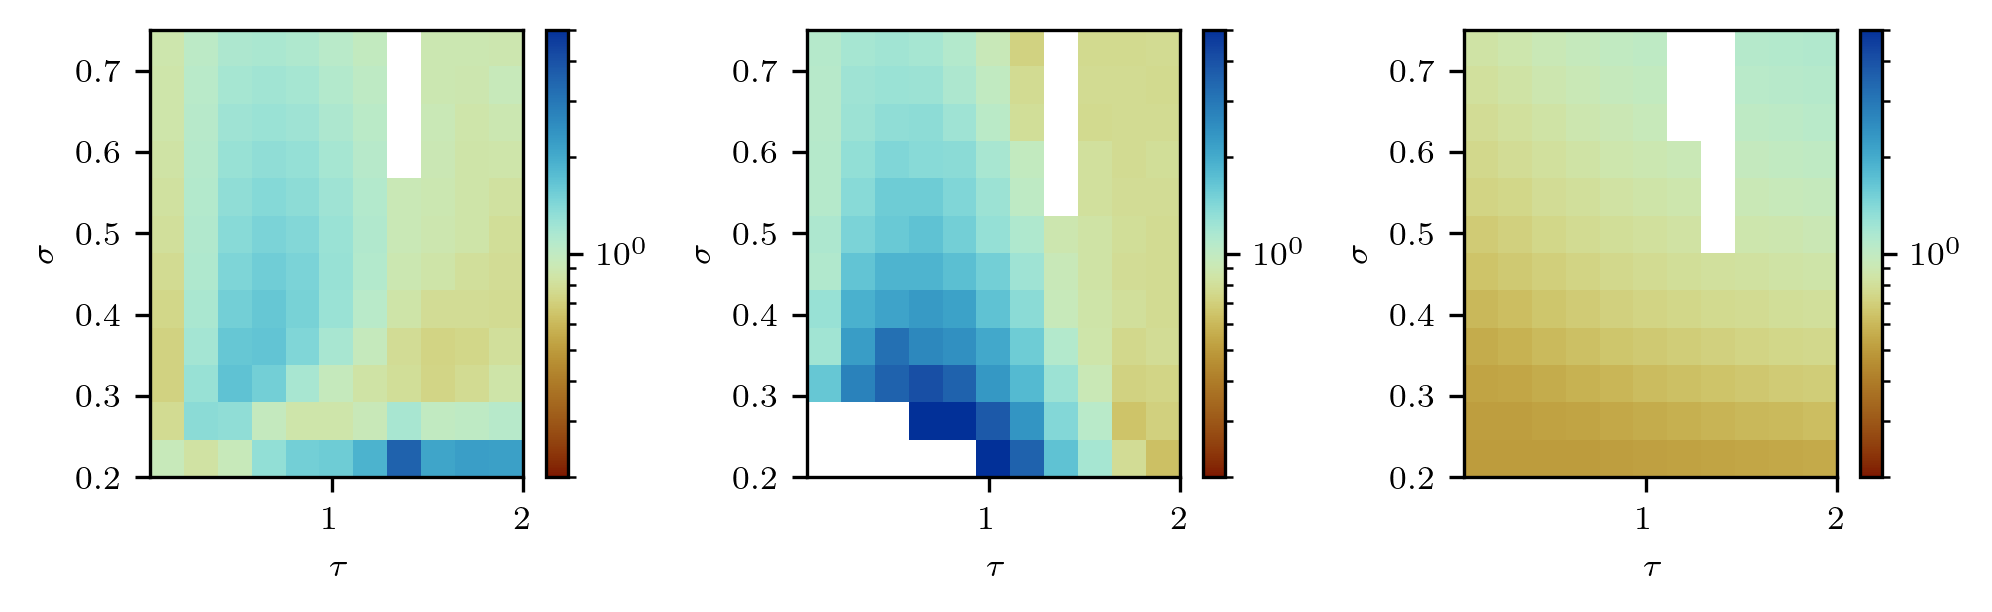

In [41]:
norm = LogNorm(vmin=0.2, vmax=5)


fig, axs = plt.subplots(1,3,figsize=(two_col, std_height), squeeze=False)
ims = axs[0,0].imshow(all_num_rates_abs[:,:,0] / all_num_rates[:,:,0],
        origin = 'lower',
        extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
        aspect='auto',
        cmap = mycmap,
        norm=norm)
axs[0,0].set_xlabel(r'$\tau$')
axs[0,0].set_ylabel(r'$\sigma$')
plt.colorbar(ims, ax = axs[0,0])

ims = axs[0,1].imshow(all_sim_rates_abs[:,:,0] / all_sim_rates[:,:,0],
    norm = norm,
    origin = 'lower',
    extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
    aspect='auto',
    cmap = mycmap)
axs[0,1].set_xlabel(r'$\tau$')
axs[0,1].set_ylabel(r'$\sigma$')
plt.colorbar(ims , ax = axs[0,1])

if True: #change also subplot above 12 -> 13
    ims = axs[0,2].imshow(st_rates_abs[:,:,0] / st_rates[:,:,0],
        norm = norm,
        origin = 'lower',
        extent= [taus[0], taus[-1], s_s[0], s_s[-1]],
        aspect='auto',
        cmap = mycmap)
    axs[0,2].set_xlabel(r'$\tau$')
    axs[0,2].set_ylabel(r'$\sigma$')
    plt.colorbar(ims, ax = axs[0,2])

plt.tight_layout()


0.6000000000000001


/tmp/ipykernel_15595/1489092135.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(s_s,all_sim_rates_abs[:,tau_i,0] / (1/2*all_sim_rates[:,tau_i,0]), label = 'sim')


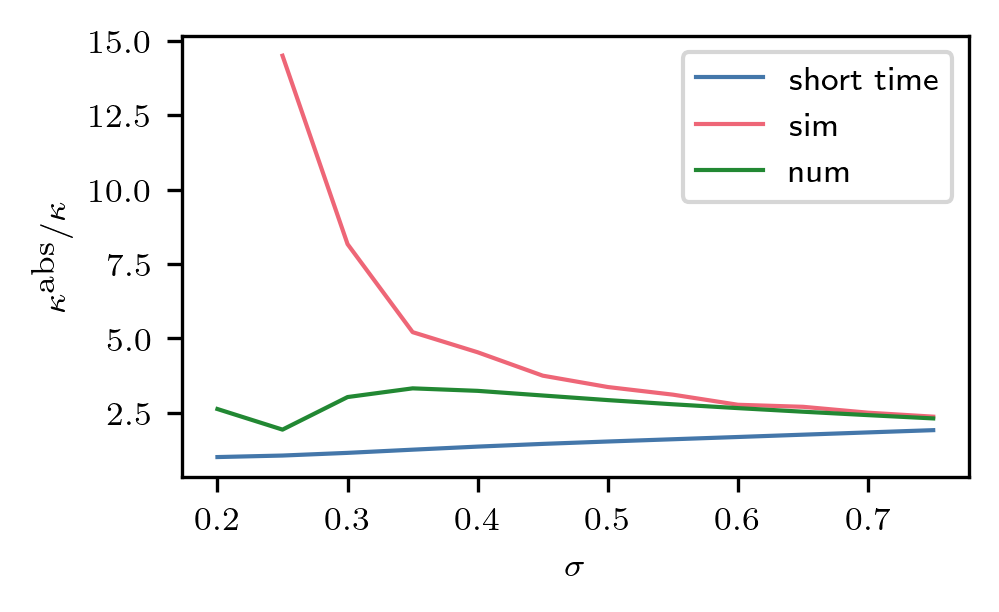

In [66]:
tau_i = 3
print(taus[tau_i])
plt.plot(s_s,st_rates_abs[:,tau_i,0] / (1/2*st_rates[:,tau_i,0]), label = 'short time') #1/2 because kappa for complete potential is missing prefactor
plt.plot(s_s,all_sim_rates_abs[:,tau_i,0] / (1/2*all_sim_rates[:,tau_i,0]), label = 'sim')
plt.plot(s_s,all_num_rates_abs[:,tau_i,0] / (1/2*all_num_rates[:,tau_i,0]), label = 'num')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\kappa^{\textrm{abs}} / \kappa$')
plt.legend()
plt.tight_layout()

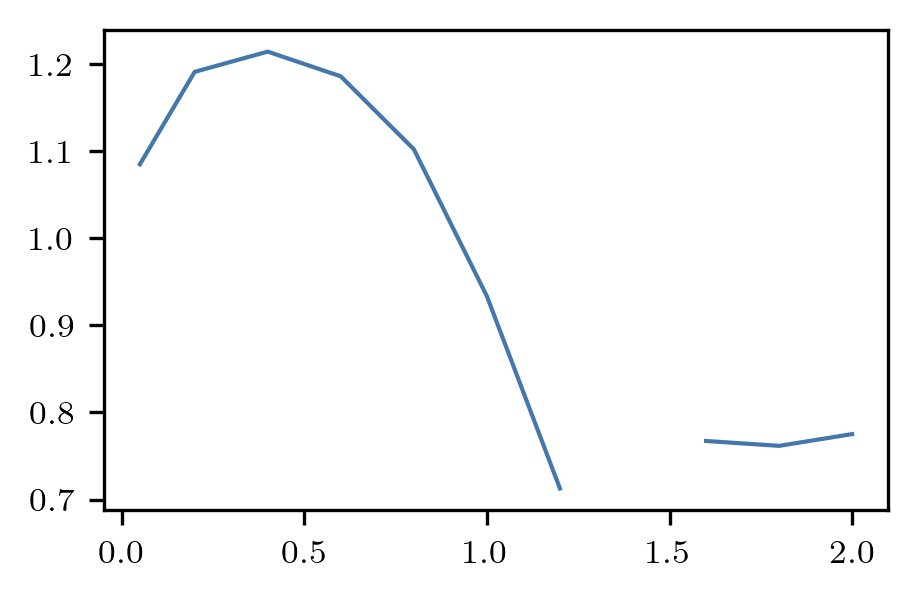

In [15]:
plt.plot(taus, all_abs[s_s[s_idx]]['sim_rates'][:,0] / all_data[s_s[s_idx]]['sim_rates'][:,0])